In [1]:
import make_dataset_v02 as md
import manipulate_image as mi
import manipulate_dataset as mp
from IPython.display import display, clear_output
from pycsi import MyConfigs
import matplotlib.pyplot as plt
import numpy as np

Setting camera stream...Done
Loading CSI...
CSI npy load start... Wed Feb 14 17:52:57 2024
loaded
scaled
Removing sm...Done
CSI (186643, 30, 3, 3) load complete Wed Feb 14 17:53:50 2024
Loading label...Done
Masking...


/home/bob/datastore/CSI-python/make_dataset_v02.py:512: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(threshold / np.max(threshold))


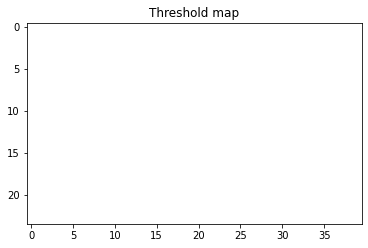

  0%|          | 0/5400 [00:00<?, ?it/s]

Done
Starting exporting image...
Setting camera stream...Done


  0%|          | 0/5400 [00:00<?, ?it/s]

Done
Setting camera stream...Done
Loading CSI...
CSI npy load start... Wed Feb 14 18:28:24 2024
loaded
scaled
Removing sm...Done
CSI (178280, 30, 3, 3) load complete Wed Feb 14 18:29:14 2024
Loading label...Done
Masking...


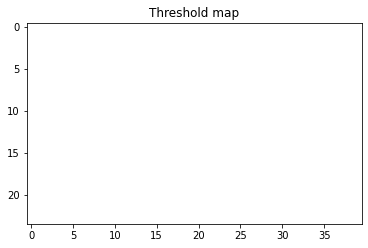

  0%|          | 0/5000 [00:00<?, ?it/s]

Done
Starting exporting image...
Setting camera stream...Done


  0%|          | 0/5000 [00:00<?, ?it/s]

Done
Setting camera stream...Done
Loading CSI...
CSI npy load start... Wed Feb 14 19:00:58 2024
loaded
scaled
Removing sm...Done
CSI (173802, 30, 3, 3) load complete Wed Feb 14 19:01:47 2024
Loading label...Done
Masking...


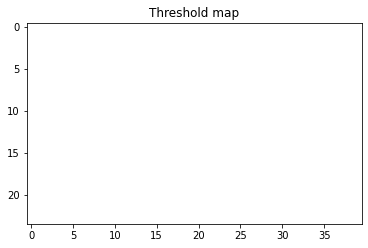

  0%|          | 0/5100 [00:00<?, ?it/s]

Done
Starting exporting image...
Setting camera stream...Done


  0%|          | 0/5100 [00:00<?, ?it/s]

Done
Setting camera stream...Done
Loading CSI...
CSI npy load start... Wed Feb 14 19:34:02 2024
loaded
scaled
Removing sm...Done
CSI (211747, 30, 3, 3) load complete Wed Feb 14 19:35:03 2024
Loading label...Done
Masking...


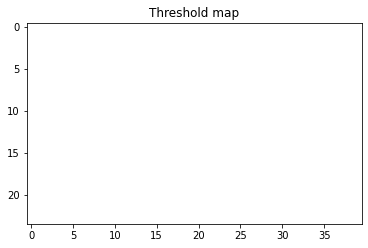

  0%|          | 0/5100 [00:00<?, ?it/s]

Done
Starting exporting image...
Setting camera stream...Done


  0%|          | 0/5100 [00:00<?, ?it/s]

Done


In [2]:
%matplotlib inline
date = '0509'
make = 15

subs = [
    ('01', 5400),
    ('02', 5000),
    ('03', 5100), 
    ('04', 5100)]

configs = MyConfigs()
configs.tx_rate = 0x1c113
configs.ntx = 3

for (sub, length) in subs:

    path = {'bag': f"../sense/{date}/{sub}.bag",
            'localtime': f"../sense/{date}/{sub}_timestamps.txt",
            'csi': f"../npsave/{date}/{date}A{sub}-csio.npy",  
            'label': f"../sense/{date}/{sub}_labels.csv",
            'save': f"../dataset/0509/{make}",
           }

    mkdata = md.MyDataMakerV02(csi_configs=configs, img_size=(40, 24), paths=path, total_frames=length, csi_length=30, assemble_number=1)
    mkdata.depth_mask(0.7)
    mkdata.save_raw_images(length)